# Predictive analytics - Exploring Factors Influencing Buyers Behaviour

In [92]:
import pandas as pd

In [93]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, we have to do the necessary data conversion

In [95]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [96]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [97]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [98]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [99]:
df.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


### Data Distribution

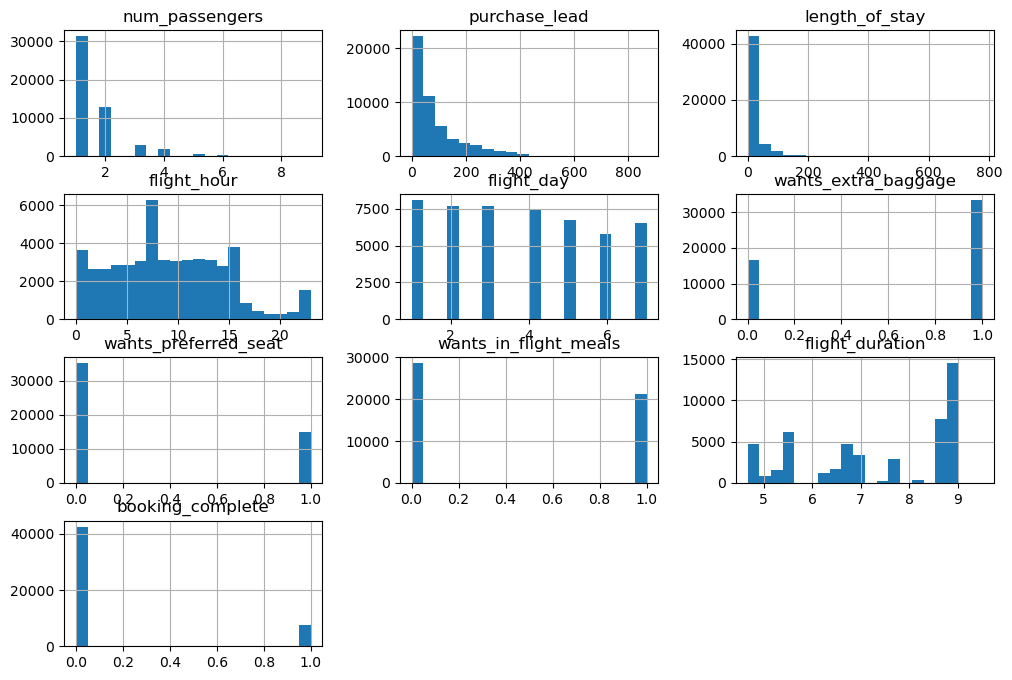

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of numerical columns
df.hist(figsize=(12, 8), bins=20)
plt.show()

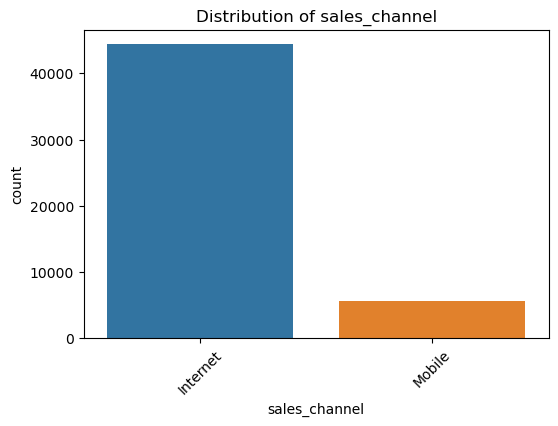

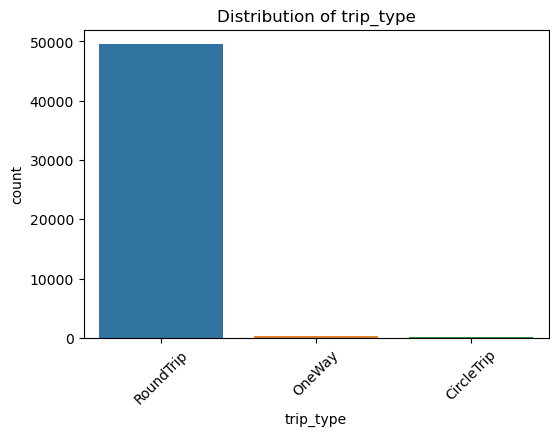

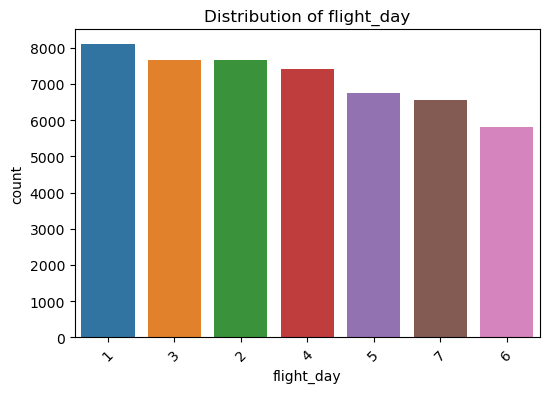

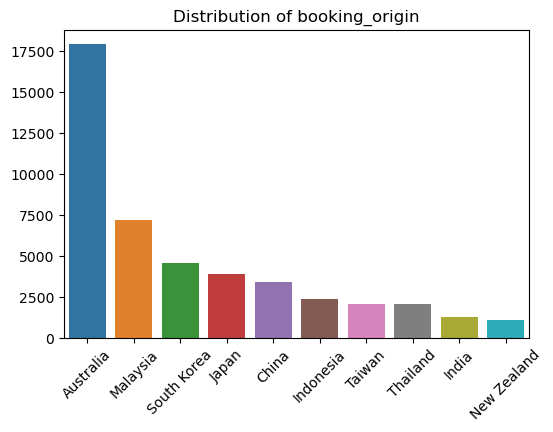

In [101]:
# categorical columns
categorical_cols = ["sales_channel", "trip_type", "flight_day", "booking_origin"]

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    
    if col == "booking_origin":
        top_10_origins = df["booking_origin"].value_counts().nlargest(10)
        sns.barplot(x=top_10_origins.index, y=top_10_origins.values)
    else:
        sns.countplot(x=df[col], order=df[col].value_counts().index)
    
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()


### Correllation Analysis

C:\Users\orias\AppData\Local\Temp\ipykernel_20288\3419980650.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)


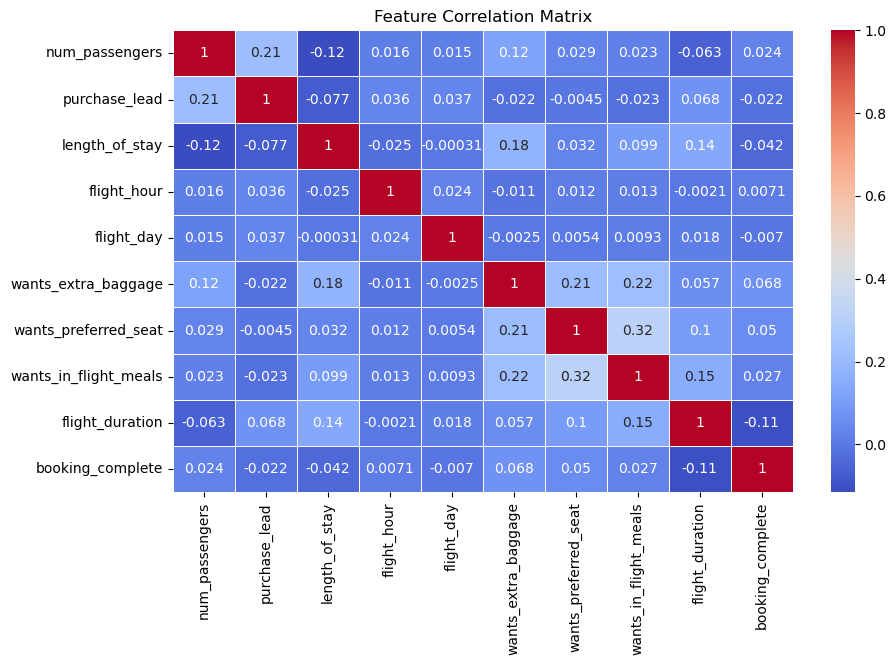

In [102]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

### Relationship between some relevant features

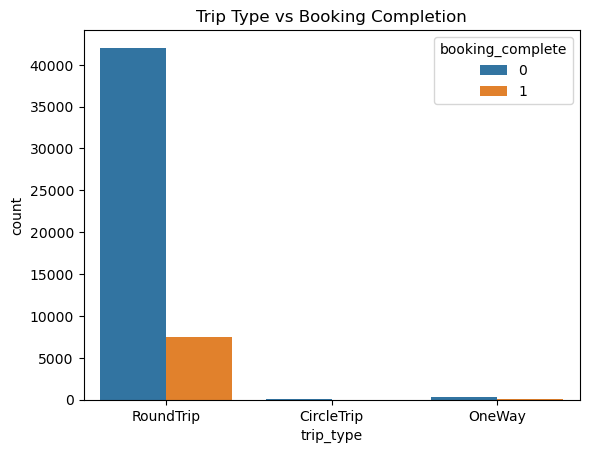

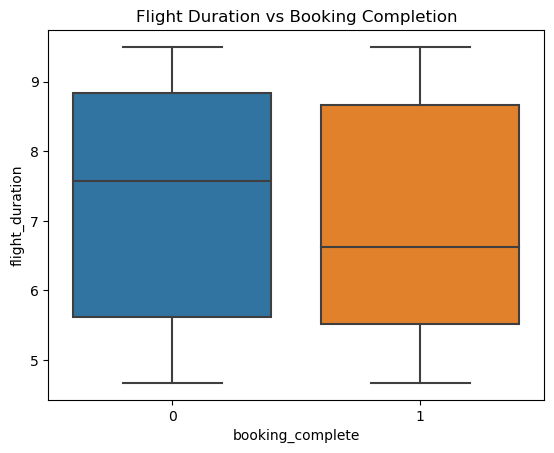

In [103]:
# Relationship between trip type and booking completion
sns.countplot(x="trip_type", hue="booking_complete", data=df)
plt.title("Trip Type vs Booking Completion")
plt.show()

# Relationship between flight duration and booking completion
sns.boxplot(x="booking_complete", y="flight_duration", data=df)
plt.title("Flight Duration vs Booking Completion")
plt.show()

### Checking for Any Outlier

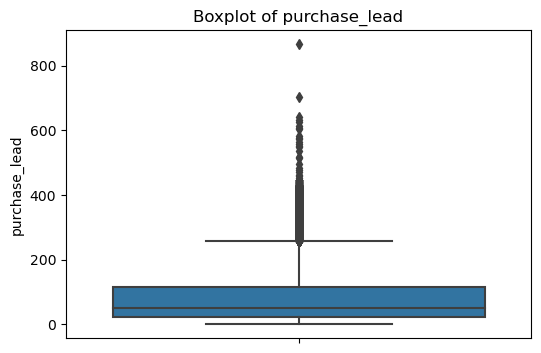

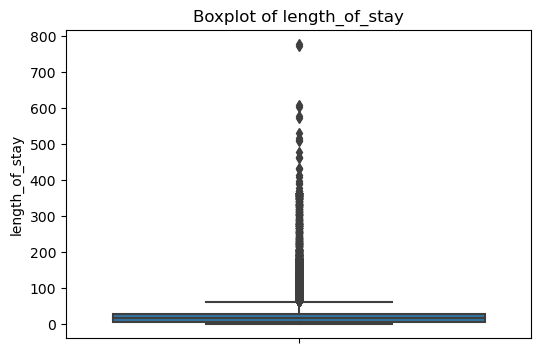

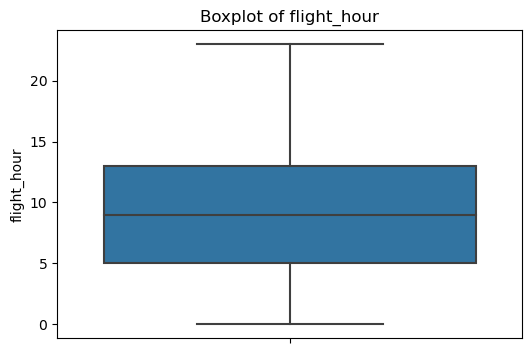

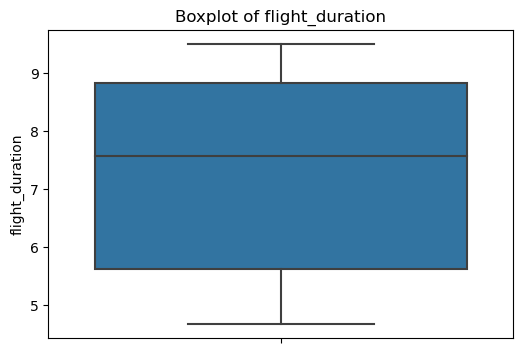

In [104]:
# Boxplots for numerical variables
num_cols = ["purchase_lead", "length_of_stay", "flight_hour", "flight_duration"]
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

In [106]:
df.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0


In [107]:
df.shape

(50000, 14)

In [108]:
df["sales_channel"].unique()


array(['Internet', 'Mobile'], dtype=object)

In [109]:
mapping = {
    "Internet":1,
    "Mobile": 2,
}

df["sales_channel"] = df["sales_channel"].map(mapping)

In [110]:
df["trip_type"].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [111]:
mapping = {
    "RoundTrip":1,
    "CircleTrip": 2,
    "OneWay": 3
}

df["trip_type"] = df["trip_type"].map(mapping)

In [112]:
#Frequency encoding was used since it has many unique values
df["booking_origin_freq"] = df["booking_origin"].map(df["booking_origin"].value_counts() / len(df))
df.drop(columns=["booking_origin"], inplace=True)

In [113]:
df["route_freq"] = df["route"].map(df["route"].value_counts() / len(df))
df.drop(columns=["route"], inplace=True)

In [114]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_origin_freq,route_freq
0,2,1,1,262,19,7,6,1,0,0,5.52,0,0.02148,0.00040
1,1,1,1,112,20,3,6,0,0,0,5.52,0,0.02148,0.00040
2,2,1,1,243,22,17,3,1,1,0,5.52,0,0.02540,0.00040
3,1,1,1,96,31,4,6,0,0,1,5.52,0,0.02148,0.00040
4,2,1,1,68,22,15,3,1,0,1,5.52,0,0.02540,0.00040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1,1,27,6,9,6,1,0,1,5.62,0,0.35744,0.00442
49996,1,1,1,111,6,4,7,0,0,0,5.62,0,0.35744,0.00442
49997,1,1,1,24,6,22,6,0,0,1,5.62,0,0.35744,0.00442
49998,1,1,1,15,6,11,1,1,0,1,5.62,0,0.35744,0.00442


### Adding more features

In [115]:
# adding weekend and weekday
df["is_weekend_flight"] = df["flight_day"].apply(lambda x: 1 if x in [5, 6] else 0)

In [116]:
df.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_origin_freq,route_freq,is_weekend_flight
0,2,1,1,262,19,7,6,1,0,0,5.52,0,0.02148,0.0004,1
1,1,1,1,112,20,3,6,0,0,0,5.52,0,0.02148,0.0004,1
2,2,1,1,243,22,17,3,1,1,0,5.52,0,0.02540,0.0004,0


In [117]:
#adding time categories (Morning, afternoon and night)
def categorize_flight_hour(hour):
    if 5 <= hour < 12:
        return "morning"
    elif 12 <= hour < 18:
        return "afternoon"
    else:
        return "night"

df["flight_period"] = df["flight_hour"].apply(categorize_flight_hour)


In [118]:
df.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_origin_freq,route_freq,is_weekend_flight,flight_period
0,2,1,1,262,19,7,6,1,0,0,5.52,0,0.02148,0.0004,1,morning
1,1,1,1,112,20,3,6,0,0,0,5.52,0,0.02148,0.0004,1,night
2,2,1,1,243,22,17,3,1,1,0,5.52,0,0.02540,0.0004,0,afternoon


In [119]:
mapping = {
    "morning":1,
    "afternoon": 2,
    "night": 3
}

df["flight_period"] = df["flight_period"].map(mapping)

In [120]:
df.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_origin_freq,route_freq,is_weekend_flight,flight_period
0,2,1,1,262,19,7,6,1,0,0,5.52,0,0.02148,0.0004,1,1
1,1,1,1,112,20,3,6,0,0,0,5.52,0,0.02148,0.0004,1,3
2,2,1,1,243,22,17,3,1,1,0,5.52,0,0.02540,0.0004,0,2


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int64  
 2   trip_type              50000 non-null  int64  
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   wants_extra_baggage    50000 non-null  int64  
 8   wants_preferred_seat   50000 non-null  int64  
 9   wants_in_flight_meals  50000 non-null  int64  
 10  flight_duration        50000 non-null  float64
 11  booking_complete       50000 non-null  int64  
 12  booking_origin_freq    50000 non-null  float64
 13  route_freq             50000 non-null  float64
 14  is_weekend_flight      50000 non-null  int64  
 15  fl

### Scaling the Features

In [122]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Features to scale (excluding binary and categorical features)
num_cols = [
    "num_passengers","sales_channel","trip_type", "purchase_lead", "length_of_stay", "flight_hour", "flight_day", 
    "flight_duration", "booking_origin_freq", "route_freq", "flight_period"
]

# Initialize Standard Scaler (use MinMaxScaler() for 0-1 scaling)
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [123]:
df.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_origin_freq,route_freq,is_weekend_flight,flight_period
0,0.125,0.0,0.0,0.302191,0.024422,0.304348,0.833333,1,0,0,0.175983,0,0.060041,0.007092,1,0.0
1,0.000,0.0,0.0,0.129181,0.025707,0.130435,0.833333,0,0,0,0.175983,0,0.060041,0.007092,1,1.0
2,0.125,0.0,0.0,0.280277,0.028278,0.739130,0.333333,1,1,0,0.175983,0,0.071009,0.007092,0,0.5


### Checking for Class Imbalance

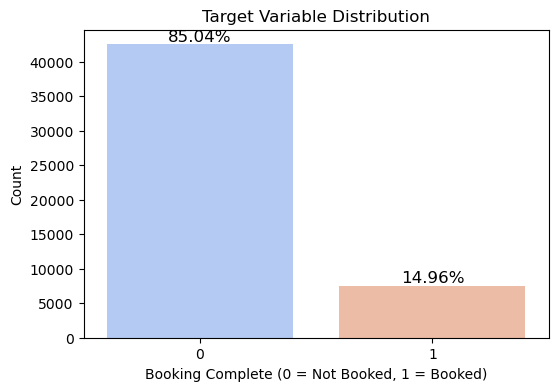

In [131]:
# Set the figure size
plt.figure(figsize=(6, 4))

# Plot the countplot for class distribution
sns.countplot(x=df["booking_complete"], palette="coolwarm")

# Add labels and title
plt.xlabel("Booking Complete (0 = Not Booked, 1 = Booked)")
plt.ylabel("Count")
plt.title("Target Variable Distribution")

# Show percentages on the bars
total = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2, height + 500, f"{height/total:.2%}", ha="center", fontsize=12)

# Show plot
plt.show()


### Splitting data into Training and Testing

In [124]:
from sklearn.model_selection import train_test_split

# Define target variable
X = df.drop(columns=["booking_complete"])  # Features
y = df["booking_complete"]  # Target

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [132]:
print(f"Training Shape is {X_train.shape}")
print(f"Test Shape is {X_test.shape}")

Training Shape is (40000, 15)
Test Shape is (10000, 15)


### Balancing the Class on the train set before Model Training

In [133]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [134]:
print(f"New Training Shape is {X_train_balanced.shape}")
print(f"Test Shape is {X_test.shape}")

New Training Shape is (68036, 15)
Test Shape is (10000, 15)


### Random Forest

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

### Evaluating the Model

In [138]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train_balanced, y_train_balanced, cv=5, scoring="accuracy")

# Print results
print(f"Cross-validation accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Cross-validation accuracy: 0.9058 ± 0.1101


### Model Performance on Test Set

Accuracy Score: 0.8395
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8504
           1       0.42      0.19      0.26      1496

    accuracy                           0.84     10000
   macro avg       0.64      0.57      0.58     10000
weighted avg       0.80      0.84      0.81     10000



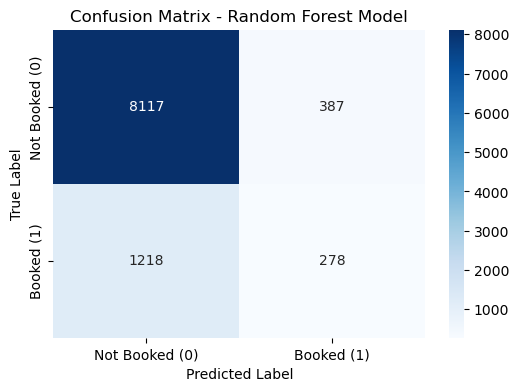

In [139]:
# Predictions
y_pred = rf_model.predict(X_test)

# Print accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Booked (0)", "Booked (1)"], yticklabels=["Not Booked (0)", "Booked (1)"])

# Labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Model")
plt.show()

### Feature Importance Analysis

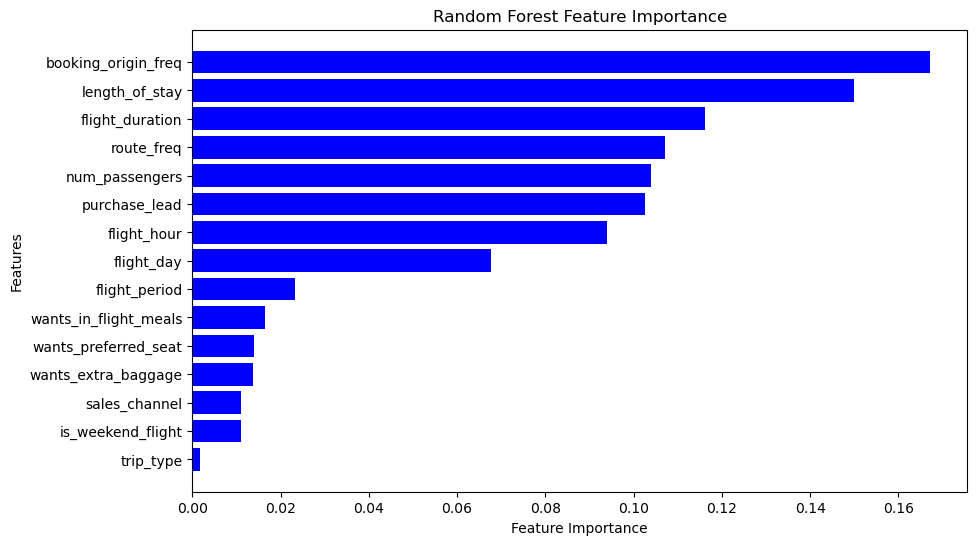

In [141]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"], color="blue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()  # Flip y-axis to show the most important feature at the top
plt.show()
